![hackio](https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.support import normalidad_ks

# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.

## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



In [3]:
# Carga de datos
df = pd.read_csv('datos/alas_del_mundo.csv')
df.head()

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0
2,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,3,0,0,0.0
3,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,4,0,0,0.0
4,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2018,10,6,3352,335.0


In [4]:
df.shape

(405624, 16)

Tenemos 405624 filas y 15 columnas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      405624 non-null  int64  
 1   Province            405624 non-null  object 
 2   City                405624 non-null  object 
 3   Gender              405624 non-null  object 
 4   Education           405624 non-null  object 
 5   Salary              302952 non-null  float64
 6   Loyalty Card        405624 non-null  object 
 7   CLV                 405624 non-null  float64
 8   Enrollment Type     405624 non-null  object 
 9   Enrollment Year     405624 non-null  int64  
 10  Enrollment Month    405624 non-null  int64  
 11  Year                405624 non-null  int64  
 12  Month               405624 non-null  int64  
 13  Flights Booked      405624 non-null  int64  
 14  Distance            405624 non-null  int64  
 15  Points Accumulated  405624 non-nul

Vemos, a priori, que solamente tenemos valores nulos en la columna `Salary`

In [6]:
df.duplicated().value_counts()

False    403760
True       1864
Name: count, dtype: int64

Como tenemos 1878 valores duplicados vamos a eliminarlos

In [7]:
df.drop_duplicates(inplace=True)

### Datos numéricos

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.38,258961.51,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.58,34983.93,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.86,6863.32,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.25,1.98,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.67,3.40,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.50,0.50,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.50,3.45,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.13,5.23,0.00,0.00,1.00,8.00,21.00
Distance,403760.0,1214.46,1434.10,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.26,146.70,0.00,0.00,53.00,240.00,676.50


Vemos que el mínimo del salario es negativo, vamos a investigarlo más a fondo

In [9]:
df[df['Salary'] <= 0].groupby('Loyalty Number')['Education'].unique().value_counts()

Education
[Bachelor]                19
[High School or Below]     1
Name: count, dtype: int64

Hay 20 personas con salario negativo de las cuales 19 tienen un nivel de estudios `Bachelor` y 1 de `High School or Below`

In [10]:
df[df['Salary'].isna()].groupby('Loyalty Number')['Education'].unique().value_counts()

Education
[College]    4238
Name: count, dtype: int64

Por otra parte, tenemos 4238 personas cuyo salario son valores nulos de las cuales todas tienen un nivel de estudios de `College`

### Datos categóricos

In [11]:
df.describe(include='O').T

,count,unique,top,freq
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


Vamos a calcular el total de personas que tiene cada valor de cada categoría

In [12]:
# Por provincias
df.groupby('Loyalty Number')['Province'].unique().value_counts()

Province
[Ontario]                 5404
[British Columbia]        4409
[Quebec]                  3300
[Alberta]                  969
[Manitoba]                 658
[New Brunswick]            636
[Nova Scotia]              518
[Saskatchewan]             409
[Newfoundland]             258
[Yukon]                    110
[Prince Edward Island]      66
Name: count, dtype: int64

In [13]:
# Por ciudades
df.groupby('Loyalty Number')['City'].unique().value_counts().head()

City
[Toronto]      3351
[Vancouver]    2582
[Montreal]     2059
[Winnipeg]      658
[Whistler]      582
Name: count, dtype: int64

In [14]:
# Por género
df.groupby('Loyalty Number')['Gender'].unique().value_counts()

Gender
[Female]    8410
[Male]      8327
Name: count, dtype: int64

In [15]:
# Por educación
df.groupby('Loyalty Number')['Education'].unique().value_counts()

Education
[Bachelor]                10475
[College]                  4238
[High School or Below]      782
[Doctor]                    734
[Master]                    508
Name: count, dtype: int64

In [16]:
# Por loyalty card
df.groupby('Loyalty Number')['Loyalty Card'].unique().value_counts()

Loyalty Card
[Star]      7637
[Nova]      5671
[Aurora]    3429
Name: count, dtype: int64

In [17]:
# Por Enrollment type
df.groupby('Loyalty Number')['Enrollment Type'].unique().value_counts()

Enrollment Type
[Standard]          15766
[2018 Promotion]      971
Name: count, dtype: int64

---

## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   


---

Antes de nada, como solo teníamos valores nulos o extraños en el salario y este campo no es relevante para este punto del análisis podemos trabajar con el conjunto de datos inicial, solamente habiendo eliminado duplicados.

### Definición de la hipótesis

* `Hipótesis nula` $H_0$: Ho hay diferencia en el número de vuelos reservados entre los diferentes niveles educativos.

* `Hipótesis alternativa` $H_1$: Sí existe diferencia entre ellos.

Construimos un DataFrame en el que agrupemos los clientes de las aerolíneas mediante su `Loyalty Number`, que es su identificdor único, y por su nivel educativo ya que es por dónde queremos segmentar. Para cada persona sumamos todos los vuelos reservados para tener su total.

In [18]:
df_vuelos = df.groupby(['Loyalty Number', 'Education'])['Flights Booked'].sum().reset_index()
df_vuelos.head()

,Loyalty Number,Education,Flights Booked
0,100018,Bachelor,157
1,100102,College,173
2,100140,College,152
3,100214,Bachelor,79
4,100272,Bachelor,127


In [19]:
niveles_eucativos = df_vuelos['Education'].unique()

In [20]:
lista_df = [df_vuelos[df_vuelos['Education'] == ed] for ed in niveles_eucativos]

In [21]:
for df in lista_df:
    print(f"El tamaño del dataframe es {df.shape[0]}")

El tamaño del dataframe es 10475
El tamaño del dataframe es 4238
El tamaño del dataframe es 508
El tamaño del dataframe es 782
El tamaño del dataframe es 734


Vemos que el tamaño de todos los dataframes es > 30 por lo que utilizaremos el test de Kormogolov para comprobar la normalidad

In [23]:
for df in lista_df:
    print(f"El valor de p es {normalidad_ks(df['Flights Booked'])[1].round(3)}")

El valor de p es 0.0
El valor de p es 0.0
El valor de p es 0.0
El valor de p es 0.0
El valor de p es 0.0


Todos los valores p son 0 (0 < 0.05) por lo que descartamos que los datos sigan distribuciones normales

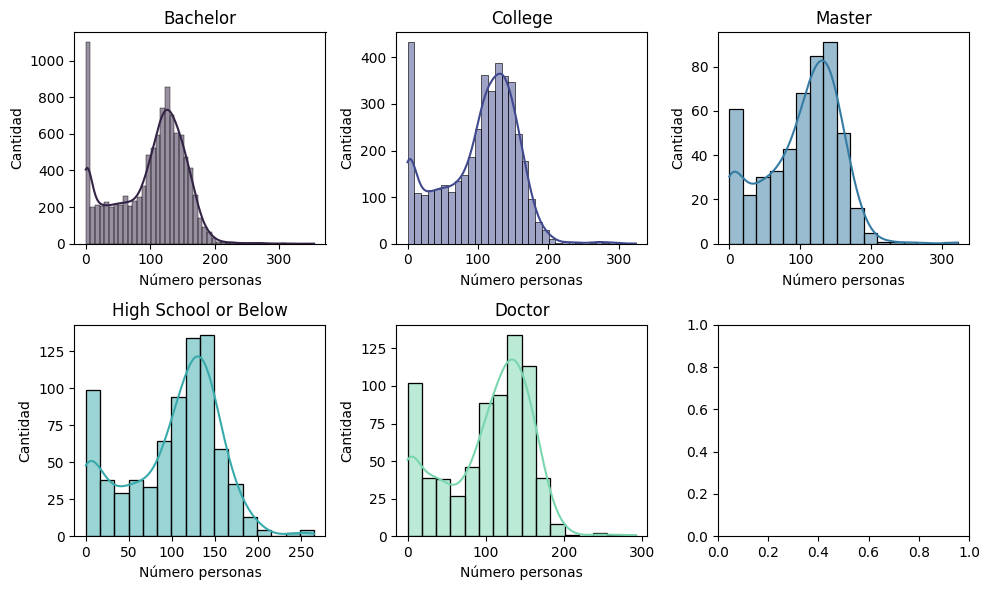

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes = axes.flat

mako_colors = sns.color_palette("mako", 5)

for i, df in enumerate(lista_df):
    sns.histplot(df['Flights Booked'], kde=True, ax=axes[i], color=mako_colors[i], element="bars")
    axes[i].set_title(niveles_eucativos[i])
    axes[i].set_xlabel('Número personas')
    axes[i].set_ylabel('Cantidad')

fig.tight_layout()
plt.show()

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones